In [566]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [567]:
# load data
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
features = ['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15',  's17',  's20', 's21','ttf','label_bnc']
col_names = ['s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15',  's17',  's20', 's21']
data_train[features].shape

(20631, 16)

In [568]:
data_train[features].head()

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf,label_bnc
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,0
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,0
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,0
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,0
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,0


In [569]:
data_train[features].describe()

,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,ttf,label_bnc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,642.680934,1590.523119,1408.933782,553.367711,2388.096652,9065.242941,47.541168,521.413470,2388.096152,8143.752722,8.442146,393.210654,38.816271,23.289705,107.807862,0.150259
std,0.500053,6.131150,9.000605,0.885092,0.070985,22.082880,0.267087,0.737553,0.071919,19.076176,0.037505,1.548763,0.180746,0.108251,68.880990,0.357334
min,641.210000,1571.040000,1382.250000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200,0.000000,0.000000
25%,642.325000,1586.260000,1402.360000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8133.245000,8.414900,392.000000,38.700000,23.221800,51.000000,0.000000
50%,642.640000,1590.100000,1408.040000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438900,393.000000,38.830000,23.297900,103.000000,0.000000
75%,643.000000,1594.380000,1414.555000,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,394.000000,38.950000,23.366800,155.000000,0.000000
max,644.530000,1616.910000,1441.490000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400,361.000000,1.000000


In [570]:
data_train[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   s2         20631 non-null  float64
 1   s3         20631 non-null  float64
 2   s4         20631 non-null  float64
 3   s7         20631 non-null  float64
 4   s8         20631 non-null  float64
 5   s9         20631 non-null  float64
 6   s11        20631 non-null  float64
 7   s12        20631 non-null  float64
 8   s13        20631 non-null  float64
 9   s14        20631 non-null  float64
 10  s15        20631 non-null  float64
 11  s17        20631 non-null  int64  
 12  s20        20631 non-null  float64
 13  s21        20631 non-null  float64
 14  ttf        20631 non-null  int64  
 15  label_bnc  20631 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 2.5 MB


<AxesSubplot:>

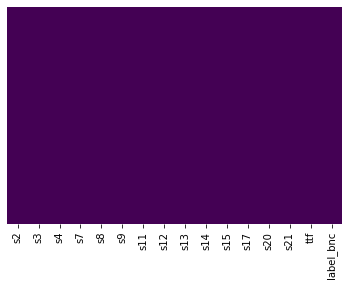

In [571]:
# xem dữ liệu thiếu khuyết
%matplotlib inline
sns.heatmap(data=data_train[features].isnull(), yticklabels=False, cbar =False, cmap = 'viridis')

In [572]:
# gán feature
X_train =data_train[col_names]
y_train = data_train['ttf']
X_test = data_test[col_names]
y_test = data_test['ttf']

## PCA

In [573]:
#chuẩn hóa
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [574]:
#tính hiệp phương sai và giá trị riêng
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[8.99551452 2.09603806 0.02927525 0.41411665 0.36830335 0.34838968
 0.30613816 0.28987223 0.25542195 0.14620716 0.17257113 0.17659941
 0.20620109 0.19602997]


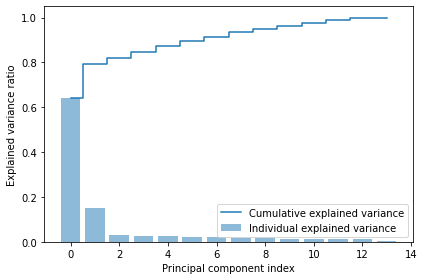

In [575]:
#vẽ biểu đồ hiện thị tỉ lệ phương sai
tot = np.sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(0,14), var_exp, alpha=0.5, align='center',
label='Individual explained variance')
plt.step(range(0,14), cum_var_exp, where='mid',
label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [576]:
# Lập danh sách các bộ giá trị
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sắp xếp các bộ giá trị từ cao đến thấp
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [577]:
U = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix U:\n', U)

Matrix U:
 [[-0.27331249 -0.01725161]
 [-0.26022579 -0.07625471]
 [-0.30118    -0.00943805]
 [ 0.29838831 -0.05261376]
 [-0.28172107  0.24449708]
 [-0.10586015 -0.64377681]
 [-0.30927369  0.01608717]
 [ 0.30441909 -0.06315447]
 [-0.28133996  0.24628416]
 [-0.06640968 -0.66683749]
 [-0.28706708 -0.02076207]
 [-0.26928992 -0.07724396]
 [ 0.28276361  0.01803297]
 [ 0.28372745  0.02246382]]


In [578]:
X_train_pca = X_train_std.dot(U)
print(X_train_std.shape, X_train_pca.shape)

(20631, 14) (20631, 2)


## dự đoán

In [579]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
regression = LinearRegression()
# giảm chiều dữ liệu
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the model
regression.fit(X_train_pca, y_train)

LinearRegression()

In [580]:
w1 = regression.coef_
w1

array([-17.02423881,  -7.83074978,   1.36609107,   1.39576368,
         2.18495224,  -0.81504365])

In [581]:
w0 =  regression.intercept_ 
w0

107.80786195530996

In [582]:
y_pred = regression.predict(X_test_pca)
y_pred

array([153.94139014, 124.66715729,  93.43095237,  92.6125707 ,
       115.17983137, 118.65004341, 129.24855257,  96.85024107,
       113.74514087, 116.24818979,  98.23286677, 110.51688978,
       101.93067504, 114.46955702, 159.15400288, 133.84735171,
        81.90778655,  78.88837094, 120.27890712,  23.24994927,
       118.16722265, 141.15199596, 151.58458871,  30.77435829,
       137.70069463, 145.49509747, 126.31999878, 109.82879596,
       120.94532308,  98.43907191,   9.83091302, 102.0375811 ,
       109.61364483,  12.32118962,   2.32103324,  38.55084503,
        80.7037274 ,  69.10685732, 155.65906484,  37.06989306,
        91.73241206,  37.7679455 ,  79.94698063, 120.41705484,
        80.30926551,  66.91677309, 120.56331515, 117.87671835,
        22.60000926, 126.98674649, 118.0002292 ,  43.05638844,
        44.85647619, 170.09031715, 141.88070192,  39.33165319,
       106.16623781,  62.0283918 , 165.20785954, 116.29116824,
        50.65325697,  86.66401511,  83.97383176,  63.15

In [583]:
# R bình % của dự đoán
train_acc = regression.score(X=X_train_pca, y=y_train)
test_acc = regression.score(X_test_pca, y_test)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 57.7 %
Accuracy on test set: 44.5 %


In [584]:
df2 = pd.DataFrame({'thực': y_test, 'dự đoán': y_pred})
df2.head()

,thực,dự đoán
0,112,153.941390
1,98,124.667157
2,69,93.430952
3,82,92.612571
4,91,115.179831


## phân loại

In [585]:
y1_train = data_train['label_bnc']
y1_test = data_test['label_bnc']

In [586]:
from sklearn.linear_model import LogisticRegression
lrClass = LogisticRegression()
lrClass.fit(X_train_pca,y1_train)

LogisticRegression()

In [587]:
ww1 = lrClass.coef_
ww1

array([[ 1.68492831,  0.48169538, -0.23038382, -0.16809135, -0.23207343,
         0.06591215]])

In [588]:
ww0 = lrClass.intercept_ 
ww0

array([-5.87195337])

In [589]:
y1_pred = lrClass.predict(X_test_pca)
y1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [590]:
df2 = pd.DataFrame({'thực': y1_test, 'dự đoán': y1_pred})
df2.head(5)

,thực,dự đoán
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [591]:
train_acc = lrClass.score(X=X_train_pca, y=y1_train)
test_acc = lrClass.score(X_test_pca, y1_test)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 95.8 %
Accuracy on test set: 93.0 %
